In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import seaborn as sbn
import import_ipynb
import FinTimeSeries as fst #Notebook with GARCH model
import fit_distribution_MLE as dist_MLE #Notebook with t-distribution related functions
import tCopula as tCopula #Notebook with tCopula functions

importing Jupyter notebook from FinTimeSeries.ipynb
importing Jupyter notebook from fit_distribution_MLE.ipynb
importing Jupyter notebook from tCopula.ipynb


In [2]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read equities data
amzn = pd.read_csv('AMZN.csv')
amd = pd.read_csv('AMD.csv')
nvda = pd.read_csv('NVDA.csv')


In [4]:
#Get the common dates/indexes between the equities
amzn_dates=pd.to_datetime(amzn['Date'])
amd_dates=pd.to_datetime(amd['Date'])
nvda_dates=pd.to_datetime(nvda['Date'])

In [5]:
type(amzn_dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
#Convert prices into log-returns
amzn_rets=np.diff(np.log(amzn['Adj Close']))
amd_rets=np.diff(np.log(amd['Adj Close']))
nvda_rets=np.diff(np.log(nvda['Adj Close']))                 

In [7]:
amzn_rets[0:10]

array([-0.00107453,  0.00122797, -0.01561448,  0.01100188, -0.02063054,
        0.01289535,  0.01556395,  0.02640666,  0.00282542, -0.00835074])

In [8]:
amd_rets[0:10]

array([ 0.01662856, -0.01627753, -0.00413309, -0.00273554,  0.00361636,
       -0.02009852,  0.02886435,  0.01162699,  0.00017255,  0.02031999])

In [9]:
nvda_rets[0:10]

array([ 0.00262053, -0.0022659 , -0.0050699 ,  0.00945547, -0.00762839,
        0.00532021,  0.03469351,  0.0461814 , -0.01111048,  0.02158247])

In [10]:
#Create financial time series objects from the log-returns
amzn_ts=fst.__FinTimeSeries__(amzn_rets)
amd_ts=fst.__FinTimeSeries__(amd_rets)
nvda_ts=fst.__FinTimeSeries__(nvda_rets)

In [11]:
#Fit econometrics models on each series
amzn_ts.fitGARCH()
amd_ts.fitGARCH()
nvda_ts.fitGARCH()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3094018.808394216
Iteration:      2,   Func. Count:     17,   Neg. LLF: 817052.2125003104
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22134.245858977745
Iteration:      4,   Func. Count:     38,   Neg. LLF: -663.7040220405447
Optimization terminated successfully    (Exit mode 0)
            Current function value: -663.7040214725957
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 816254.5916286993
Iteration:      2,   Func. Count:     17,   Neg. LLF: 175.66727494045716
Iteration:      3,   Func. Count:     26,   Neg. LLF: -535.865107677287
Iteration:      4,   Func. Count:     32,   Neg. LLF: -536.2156565451132
Iteration:      5,   Func. Count:     38,   Neg. LLF: -535.9296894650615
Iteration:      6,   Func. Count:     44,   Neg. LLF: -535.8289107123782
Iteration:      7,   Func. Count:     52,   Neg. LLF: -522.9030625

In [12]:
#Get fitted parameters
amzn_params=amzn_ts.get_garch_params()
amd_params=amd_ts.get_garch_params()
nvda_params=nvda_ts.get_garch_params()

In [13]:
print(amzn_params)
print(amd_params)
print(nvda_params)

mu          0.00145
omega       0.00003
alpha[1]    0.20000
beta[1]     0.70000
Name: params, dtype: float64
mu          0.001247
omega       0.000033
alpha[1]    0.000000
beta[1]     0.961775
Name: params, dtype: float64
mu          0.005108
omega       0.000236
alpha[1]    0.150172
beta[1]     0.564043
Name: params, dtype: float64


In [14]:
#Get iid residuals for each series
amzn_iid_residuals = amzn_ts.get_iid_residuals()
amd_iid_residuals=amd_ts.get_iid_residuals()
nvda_iid_residuals=nvda_ts.get_iid_residuals()

In [15]:
print(amzn_iid_residuals[0:10])

[-0.1388868  -0.01371489 -1.16573943  0.61847497 -1.50427369  0.68568298
  0.88998563  1.59069933  0.0760275  -0.60826853]


In [16]:
print(amd_iid_residuals[0:10])

[ 0.66917653 -0.75334431 -0.22869408 -0.16750862  0.09868772 -0.88067664
  1.12941845  0.42095992 -0.04321933  0.76165665]


In [17]:
print(nvda_iid_residuals[0:10])

[-0.10269588 -0.30933558 -0.42813839  0.18199591 -0.53761977  0.00884839
  1.24790366  1.56942376 -0.54791974  0.59367044]


In [18]:
np.mean(amzn_iid_residuals), np.std(amzn_iid_residuals)

(-0.015285030826915237, 1.0499940013377416)

In [19]:
np.mean(amd_iid_residuals), np.std(amd_iid_residuals)

(0.004067876792654303, 0.9795807785171314)

In [20]:
np.mean(nvda_iid_residuals), np.std(nvda_iid_residuals)

(-0.03671067312977894, 0.9973817462533238)

<Axes: >

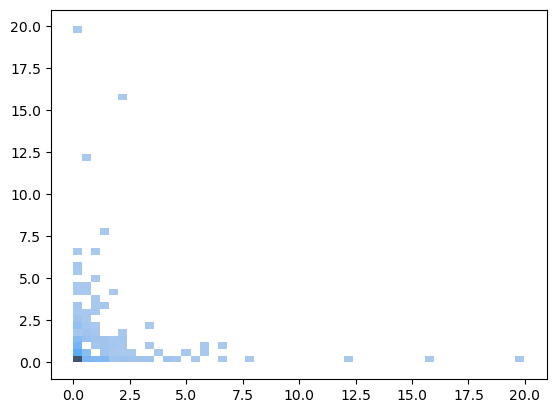

In [21]:
sbn.histplot(x=amzn_iid_residuals[0:-1]**2, y=amzn_iid_residuals[1:]**2)

In [22]:
amzn_iid_residuals.shape

(250,)

In [23]:
#Try fitting different distributions on iid residuals
combined_iid_residuals=np.zeros((3, len(amd_iid_residuals)))
combined_iid_residuals[0][:]=amzn_iid_residuals
combined_iid_residuals[1][:]=amd_iid_residuals
combined_iid_residuals[2][:]=nvda_iid_residuals

In [24]:
fitted_dofs=dist_MLE.fit_tdist_logMLE(combined_iid_residuals, np.arange(1,31))

-0.011674628030719406
1.0201823287974794
-0.0015897985142418886
0.9765789415114063
-0.009115900792780435
1.0391988173913524


In [25]:
print(fitted_dofs)

[6. 4. 4.]


In [26]:
#Get uniform variates
uniform_variates= dist_MLE.get_cdf_tdist(combined_iid_residuals, fitted_dofs)

In [27]:
#Get t-dist variates with dof=4
t_dof4_variates=dist_MLE.get_inverse_cdf(uniform_variates)


In [28]:
#Generate correlation among the equities t-variates
corrMatrix=np.corrcoef(t_dof4_variates)

In [29]:
corrMatrix

array([[1.        , 0.464875  , 0.46092269],
       [0.464875  , 1.        , 0.58016246],
       [0.46092269, 0.58016246, 1.        ]])

In [30]:
#Create a t-copula class with the correlation matrix
tCop = tCopula.tCopula(corrMatrix)

In [32]:
#Generate t-distribution random variates
tvariates=tCop.generate_random_variates(num_ts=3, num_scenarios=10000)

In [39]:
tvariates.T.shape

(3, 10000)

In [34]:
#Generate equities log return scenarios based on iid residual scenarios
def generate_return_scenarios(garch_params, random_variates, last_vol, last_epsilon):
    
     next_cond_vol = np.sqrt(garch_params[1] + garch_params[2]*(last_epsilon**2) + garch_params[3]*(last_vol**2)) 
     next_epsilon_scenarios = next_cond_vol*random_variates
     next_ret_scenarios = garch_params[0]+ next_epsilon_scenarios
        
     return next_ret_scenarios   


In [44]:
#Get last conditional vol and epsilon/main residuals
amzn_cond_vols = amzn_ts.get_conditional_vol()
amd_cond_vols = amd_ts.get_conditional_vol()
nvda_cond_vols = nvda_ts.get_conditional_vol()

In [37]:
amzn_cond_vols[-1]

0.020635340520233147

In [41]:
amzn_last_epsilon=amzn_rets[-1]-amzn_params[0]
amzn_ret_scenarios = generate_return_scenarios(amzn_params, tvariates.T[0][:],amzn_cond_vols[-1],amzn_last_epsilon)

In [45]:
amd_last_epsilon=amd_rets[-1]-amd_params[0]
amd_ret_scenarios = generate_return_scenarios(amd_params, tvariates.T[1][:],amd_cond_vols[-1],amd_last_epsilon)

In [46]:
nvda_last_epsilon=nvda_rets[-1]-nvda_params[0]
nvda_ret_scenarios = generate_return_scenarios(nvda_params, tvariates.T[2][:],nvda_cond_vols[-1],amd_last_epsilon)

In [47]:
#Create portfolio scenarios
#100 long AMZN, 100 long AMD, -100 short NVDA
combined_port_scenarios =100*amzn_ret_scenarios+100*amd_ret_scenarios-100*nvda_ret_scenarios

<Axes: ylabel='Count'>

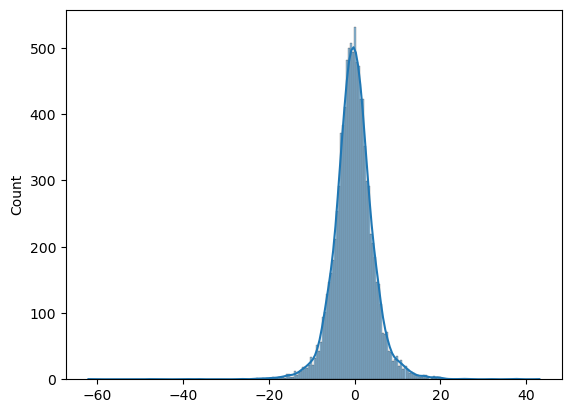

In [48]:
sbn.histplot(combined_port_scenarios, kde=True)

In [51]:
np.quantile(combined_port_scenarios, 0.01)

-12.389092638418516